In [1]:
import pandas as pd 
import os
os.chdir("/home/robbe/ionbot")
import OxiAnalysis as OA
os.chdir("/home/robbe/ionbot/Ageing_study/")
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
import matplotlib.pyplot as plt

In [2]:
quant = pd.read_csv("Ageing_combined.csv", index_col=[0])

In [3]:
SI = OA.summedintensities(quant)

In [4]:
SI

,Modifications,Gene Names,Organism,Intensity_150828_PC_VUR_C1077,Intensity_150828_PC_VUR_C1133,Intensity_150828_PC_VUR_C1134,Intensity_150828_PC_VUR_C1138,Intensity_150828_PC_VUR_C1189,Intensity_150828_PC_VUR_C1205,Intensity_150828_PC_VUR_C1256,...,Intensity_1DLC012615QE_RRAG_014B_rep1,Intensity_1DLC012615QE_RRAG_014B_rep2,Intensity_1DLC051815QE_RRAG_011B_rep1,Intensity_1DLC051815QE_RRAG_011B_rep2,Intensity_1DLC051815QE_RRAG_028B_rep1,Intensity_1DLC051815QE_RRAG_028B_rep2,Intensity_1DLC052815QE_RRAG_024B_rep1,Intensity_1DLC052815QE_RRAG_024B_rep2,Intensity_1DLC052815QE_RRAG_025B_rep1,Oxmod?
0,[1384]Homocysteic_acid[M],0.0,0.0,0.000000,0.000000,0.000000,0.000071,0.000000,0.000058,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,35
1,[1914]Met->AspSA[M],0.0,0.0,0.000000,0.000000,0.000139,0.000075,0.000076,0.000070,0.000142,...,0.000000,0.000000,0.0,0.000089,0.000000,0.000093,0.000000,0.0001,0.000101,66
2,[1915]Decarboxylation[D],0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000040,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000085,0.000000,0.000000,0.0000,0.000086,27
3,[1915]Decarboxylation[E],0.0,0.0,0.000090,0.000000,0.000000,0.000000,0.000134,0.000039,0.000080,...,0.000000,0.000000,0.0,0.000000,0.000122,0.000000,0.000000,0.0000,0.000000,52
4,[1916]Aspartylurea[H],0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000068,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,[743]4-ONE+Delta:H(-2)O(-1)[H],0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,2
83,[860]G-H1[R],0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,7
84,[936]Chlorination[Y],0.0,0.0,0.000096,0.000075,0.000000,0.000132,0.000096,0.000091,0.000117,...,0.000141,0.000124,0.0,0.000150,0.000000,0.000000,0.000000,0.0000,0.000000,54
85,[937]dichlorination[Y],0.0,0.0,0.000000,0.000095,0.000000,0.000068,0.000049,0.000056,0.000084,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,14


In [5]:
Young = SI.filter(regex="Modifications|Protein Groups|PC_VUR")
Old = SI.filter(regex="Modifications|Protein Groups|RRAG")

In [6]:
dict = {}
patientIDlist = []
patientIDBlist = []
for i in [6,11,14,24,25,28]:
    patientID = "_"+str(i).zfill(3)+"_"
    patientIDB = "_"+str(i).zfill(3)+"B_"
    patientIDlist.append(patientID)
    patientIDBlist.append(patientIDB)
for patient in patientIDlist:
    selected = Old[[col for col in Old if patient in col]]
    selected["Modifications"] = Old["Modifications"]
    dict[patient] = selected
for patientB in patientIDBlist:
    selectedB = Old[[col for col in Old if patientB in col]]
    selected["Modifications"] = Old["Modifications"]
    dict[patientB] = selectedB

In [7]:
for i in dict:
    df = dict[i]
    df["median"] = df.median(axis=1)

In [8]:
df

,Intensity_1DLC051815QE_RRAG_028B_rep1,Intensity_1DLC051815QE_RRAG_028B_rep2,median
0,0.000000,0.000000,0.000000
1,0.000000,0.000093,0.000047
2,0.000085,0.000000,0.000043
3,0.000122,0.000000,0.000061
4,0.000000,0.000000,0.000000
...,...,...,...
82,0.000000,0.000000,0.000000
83,0.000000,0.000000,0.000000
84,0.000000,0.000000,0.000000
85,0.000000,0.000000,0.000000


In [9]:
Oldrep = pd.DataFrame()
Oldrep["Modifications"] = Old["Modifications"]
for patient in dict:
    Oldrep[patient] = dict[patient]["median"]

In [10]:
Oldrep

,Modifications,_006_,_011_,_014_,_024_,_025_,_028_,_006B_,_011B_,_014B_,_024B_,_025B_,_028B_
0,[1384]Homocysteic_acid[M],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,[1914]Met->AspSA[M],0.000000,0.000000,0.000000,0.000000,0.000074,0.000000,0.000000,0.000044,0.000000,0.000050,0.000101,0.000047
2,[1915]Decarboxylation[D],0.000044,0.000042,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000086,0.000043
3,[1915]Decarboxylation[E],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000061
4,[1916]Aspartylurea[H],0.000000,0.000053,0.000000,0.000024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,[743]4-ONE+Delta:H(-2)O(-1)[H],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
83,[860]G-H1[R],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
84,[936]Chlorination[Y],0.000186,0.000186,0.000123,0.000058,0.000067,0.000113,0.000130,0.000075,0.000132,0.000000,0.000000,0.000000
85,[937]dichlorination[Y],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Boxplot

In [11]:
def boxplots(Controldf, Treatmentdf, specific=True):
    import scipy.stats as stats
    from statsmodels.stats.multitest import multipletests
    from pyteomics import mass as pymass
    from itertools import combinations
    import re
    from statannotations.Annotator import Annotator
    db = pymass.Unimod()

    pvallist = []
    for index, row in Controldf.iterrows():
        for index2, row2 in Treatmentdf.iterrows():
            if index == index2:
                if specific:
                    mod = row["Modifications"]
                    modname = re.search(pattern=r"\[\d+\](.*)", string=mod).group(1)
                else:
                    mod = row["UnimodAccession"]
                    modname = mod
                dataControl = Controldf.iloc[index][1:]
                dataControl = dataControl.astype(float)
                dataControl = dataControl.astype(float)
                dataControl = dataControl[dataControl != 0]
                dataTreatment = Treatmentdf.iloc[index][1:]
                dataTreatment = dataTreatment.astype(float)
                dataTreatment = dataTreatment[dataTreatment !=0]
                if dataTreatment.size != 0 and dataControl.size != 0:
                    pval = stats.mannwhitneyu(dataControl, dataTreatment).pvalue
                    pvallist.append(pval)
                    if (pval < 0.05):
                        plt.figure(figsize=(6,6))
                        df = pd.DataFrame({"Young": pd.Series(dataControl.values), "Old": pd.Series(dataTreatment.values)})
                        
                        ax = sns.boxplot(data=df)
                        pairs = list(combinations(["Young", "Old"], r=2))
                        annotator = Annotator(ax, pairs = pairs, data=df)
                        annotator.configure(test="Mann-Whitney", verbose=0, text_format="simple")
                        annotator.apply_and_annotate()
                        sns.stripplot(data=df, alpha = 0.7, color="black")
                        plt.title("{}-modified peptide intensities".format(modname))
                        plt.ylabel("Summed PTM abundances")
                        plt.savefig("/home/robbe/ionbot/Images/Ageing_Boxplots_{}".format(modname), dpi=300, bbox_inches="tight")
                        plt.show()
                            
    corrected_pvals = multipletests(pvallist, method= "fdr_bh")[1].tolist()
    counter = 0
    for i in zip(pvallist, corrected_pvals):
        if i[0] < 0.05:
            print("{}: {} => {}".format(counter, i[0], i[1]))
            counter += 1
            


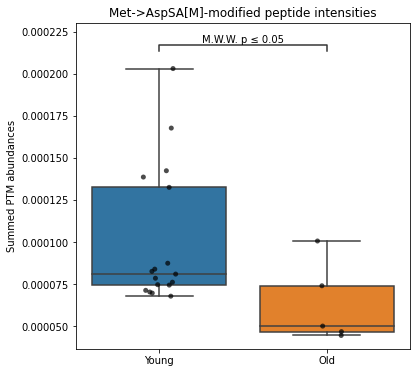

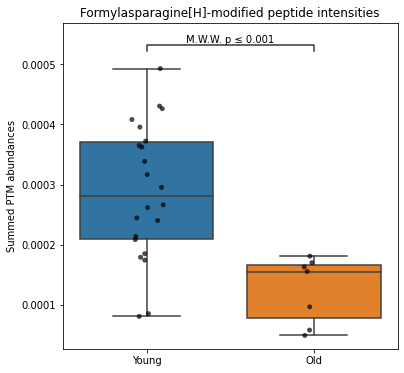

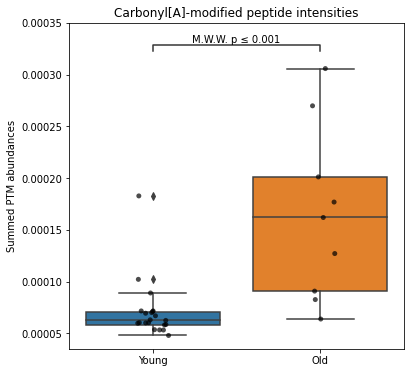

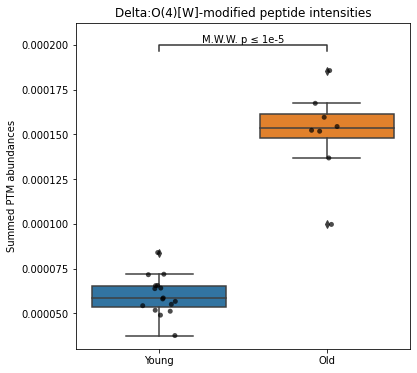

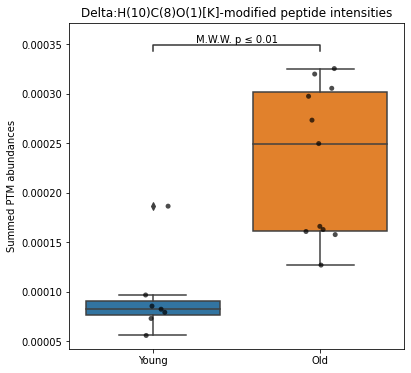

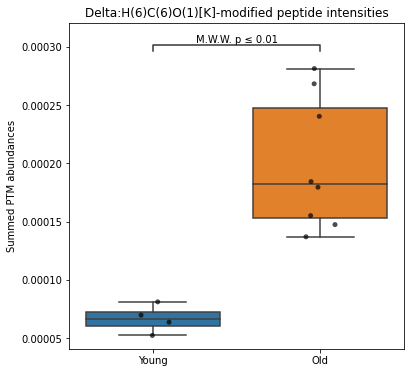

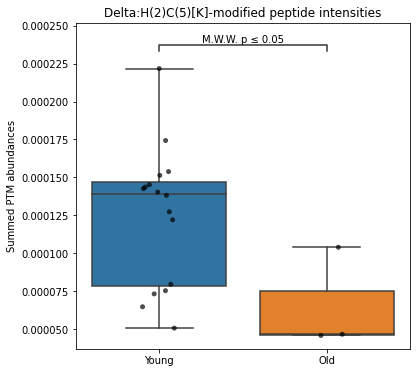

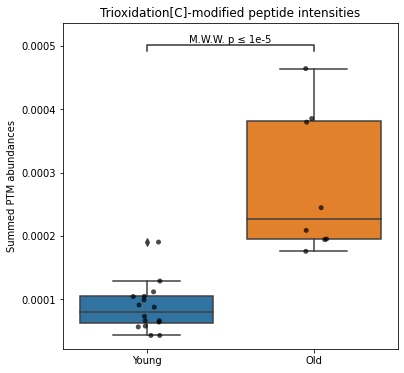

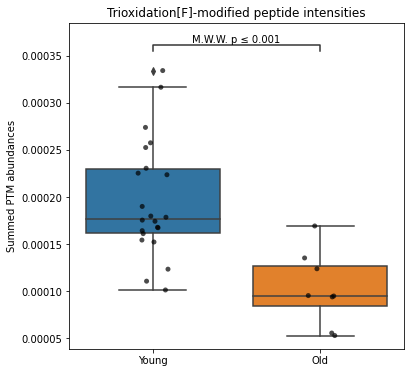

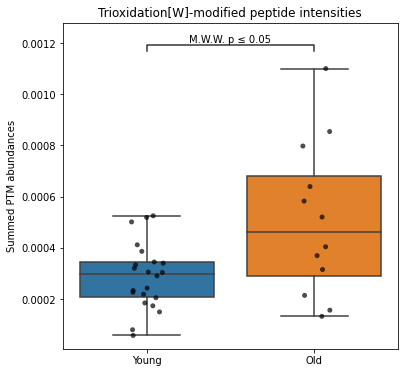

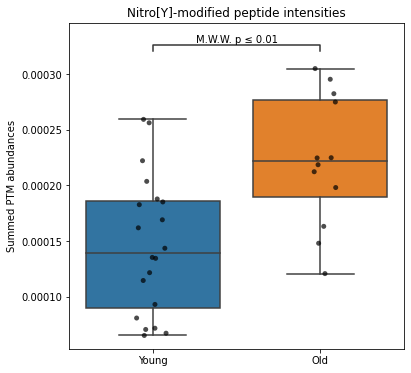

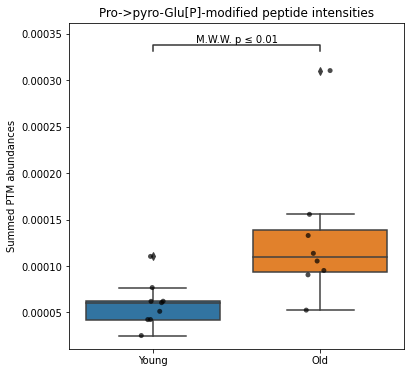

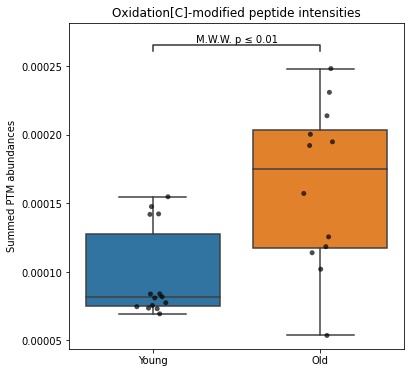

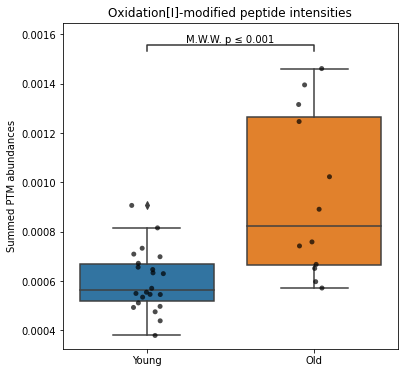

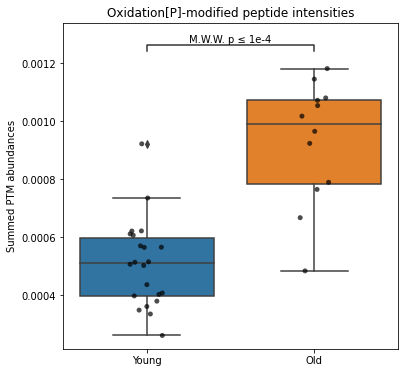

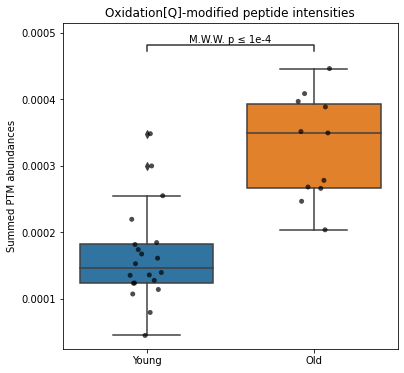

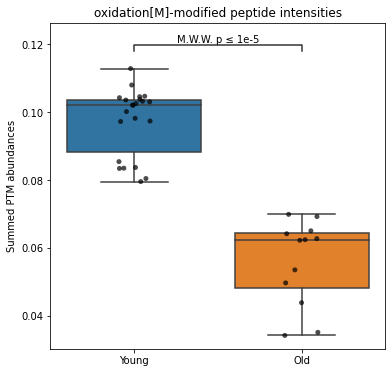

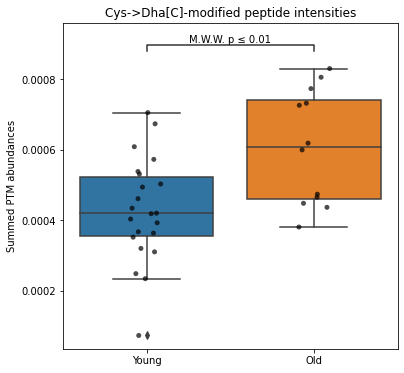

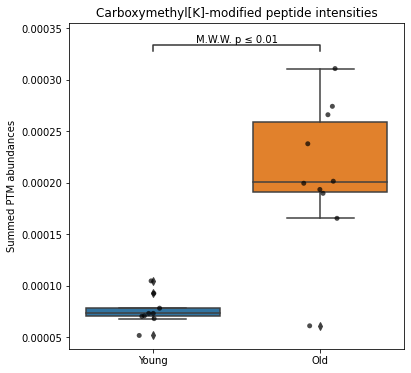

0: 0.03865724918356497 => 0.1261447078621594
1: 0.0003152270018836735 => 0.0027920105881125367
2: 0.0004926270009862024 => 0.0038178592576430686
3: 2.719345834166133e-06 => 8.429972085915012e-05
4: 0.0011940673705379587 => 0.007403217697335344
5: 0.00404040404040404 => 0.01926961926961927
6: 0.033023735810113516 => 0.12043950707217872
7: 5.438691668332266e-06 => 0.00011239962781220015
8: 0.00020810107766629506 => 0.002150377802551716
9: 0.038250879960103464 => 0.1261447078621594
10: 0.003294499897095937 => 0.01702158280166234
11: 0.005512134923899629 => 0.022783491018785133
12: 0.005927900834100707 => 0.02297061573214024
13: 0.0007530302153165608 => 0.0051875414832918635
14: 3.6865659808498135e-05 => 0.0005714177270317211
15: 6.773274595142255e-05 => 0.0008398860497976396
16: 2.148485851840218e-06 => 8.429972085915012e-05
17: 0.004670192363741602 => 0.020682280467998523
18: 0.0028804846690270907 => 0.016235459043607237


In [12]:
boxplots(Young, Oldrep)

In [13]:
#Specific aanpassen, klopt niet voor nu
#boxplots(Young,Oldrep, specific=False)

# Non-specific

In [14]:
Young["UnimodAccession"] = Young["Modifications"].apply(OA.get_unimod_acc)
Oldrep["UnimodAccession"] = Oldrep["Modifications"].apply(OA.get_unimod_acc)

In [15]:
YoungNS = Young.groupby("UnimodAccession").sum().reset_index()
OldNS = Oldrep.groupby("UnimodAccession").sum().reset_index()

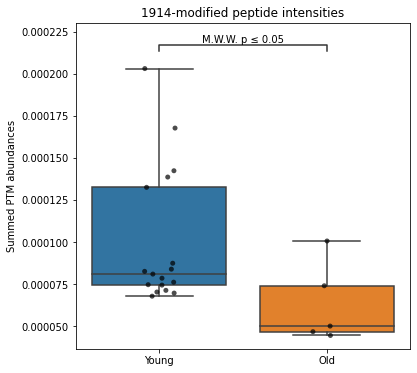

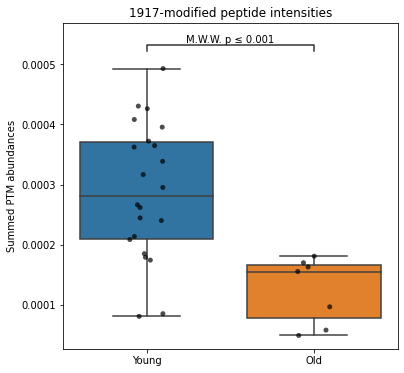

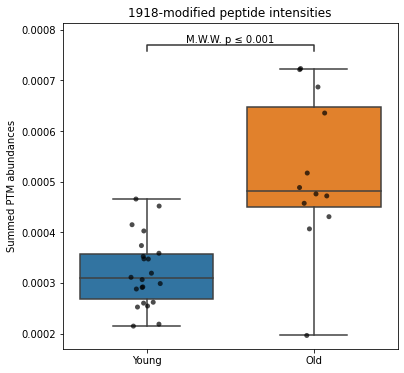

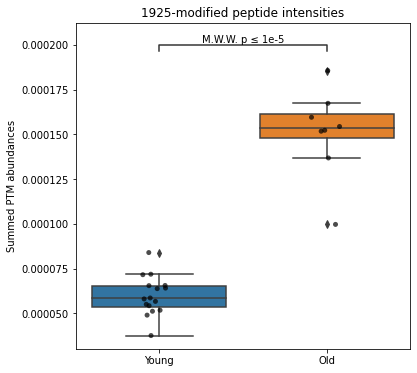

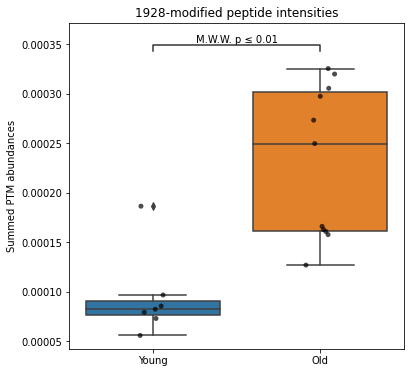

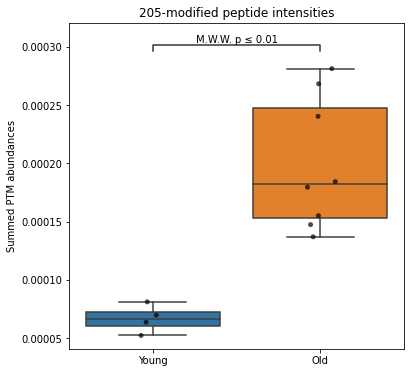

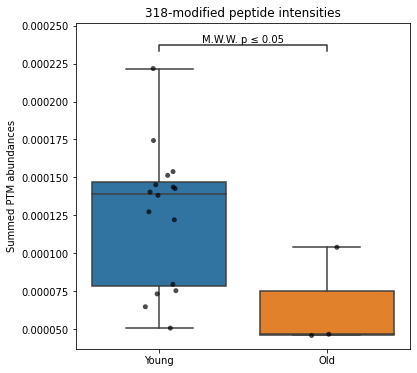

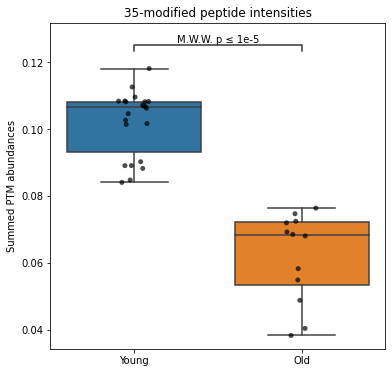

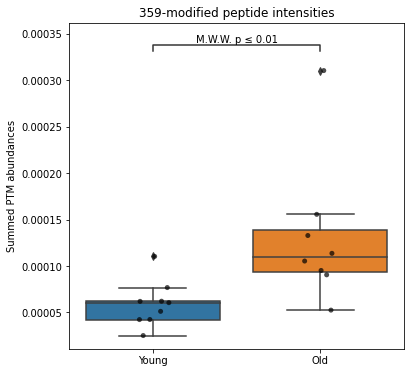

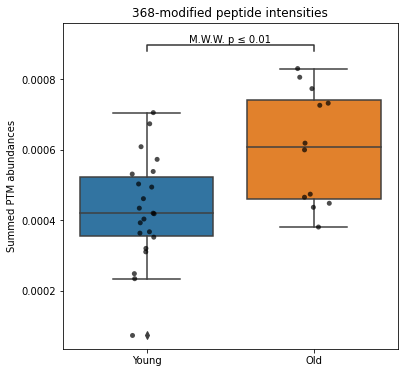

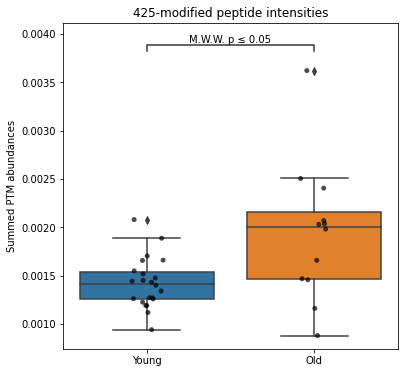

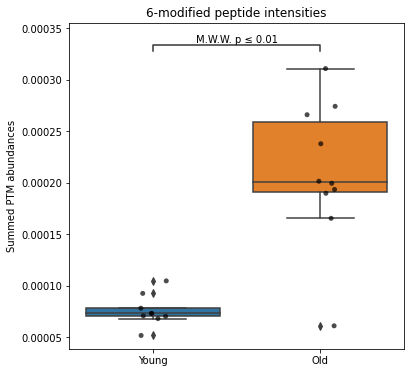

0: 0.03865724918356497 => 0.10308599782283993
1: 0.0003152270018836735 => 0.002521816015069388
2: 0.00019157015350537124 => 0.00204341497072396
3: 2.719345834166133e-06 => 4.3509533346658125e-05
4: 0.0011940673705379587 => 0.007642031171442935
5: 0.00404040404040404 => 0.01847041847041847
6: 0.033023735810113516 => 0.09606904962942114
7: 2.148485851840218e-06 => 4.3509533346658125e-05
8: 0.005512134923899629 => 0.019598701951643125
9: 0.004670192363741602 => 0.018680769454966408
10: 0.01825247593449743 => 0.058407922990391783
11: 0.0028804846690270907 => 0.015362584901477816


In [16]:
boxplots(Controldf=YoungNS, Treatmentdf=OldNS, specific=False)